**Student Name and Number as per student card:** Sunny Rao Karegam - 20058107

**Programme:**  MSc. Data Analytics

**Lecturer Name:**  Alexander Victor

**Module/Subject Title:** Programming for Data Analysis Project

**Assignment Title:** Stroke Risk Prediction



\\



**By submitting this assignment, I am confirming that:**

•	This assignment is all my own work;

•	Any sources used have been referenced;

•	I have followed the Generative AI instructions/ scale set out in the Assignment Brief;

•	I have read the College rules regarding academic integrity in the QAH Part B Section 3, and the Generative AI Guidelines, and understand that penalties will be applied accordingly if work is found not to be my/our own.
I understand that all work submitted may be code-matched report to show any similarities with other work.


# Stroke Risk Prediction

This project aims to predict the likelihood of a stroke by analyzing patient health data, incorporating demographic, lifestyle, and health-related attributes using various machine learning techniques.

##Importing Required Libraries

In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Load and Explore Dataset ([healthcare-dataset-stroke-data.csv](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset))

In [34]:
# load data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
# understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [38]:
# Check Missing Values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## Data Cleaning


In [39]:
# Filling missing BMI values with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [40]:
# Removing irrelevant columns like 'id'
df.drop('id', axis=1, inplace=True)

In [41]:
# Check Missing Values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


##Encoding Categorical Variables

In [42]:
# Encoding categorical columns into numerical values using LabelEncoder.
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


##Detecting and Removing Outliers Using the IQR Method

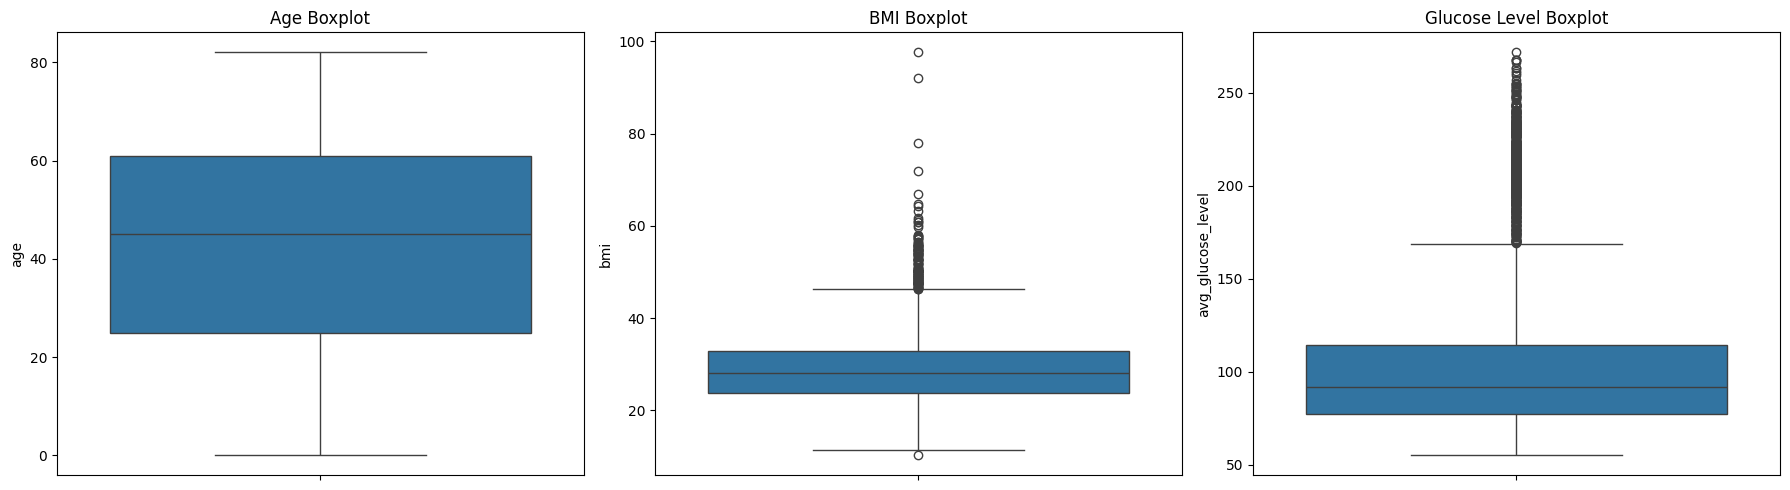

In [43]:
# Boxplots for outlier detection
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['age'], ax=axs[0])
axs[0].set_title('Age Boxplot')

sns.boxplot(y=df['bmi'], ax=axs[1])
axs[1].set_title('BMI Boxplot')

sns.boxplot(y=df['avg_glucose_level'], ax=axs[2])
axs[2].set_title('Glucose Level Boxplot')

plt.tight_layout()
plt.show()

In [44]:
# Using IQR to detect outliers
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))]
    return outliers

bmi_outliers = detect_outliers_iqr(df, 'bmi')
glucose_outliers = detect_outliers_iqr(df, 'avg_glucose_level')

print(f'Outliers in BMI: {len(bmi_outliers)}')
print(f'Outliers in Glucose Level: {len(glucose_outliers)}')

Outliers in BMI: 126
Outliers in Glucose Level: 627


In [45]:
# Removing Outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to clean
cols_to_check = ['bmi', 'avg_glucose_level']
df_clean = remove_outliers(df, cols_to_check)

print("Before:", df.shape)
print("After:", df_clean.shape)

Before: (5110, 11)
After: (4390, 11)


In [46]:
# Assigning the cleaned DataFrame to the original DataFrame variable.
df = df_clean

## Data Visualization

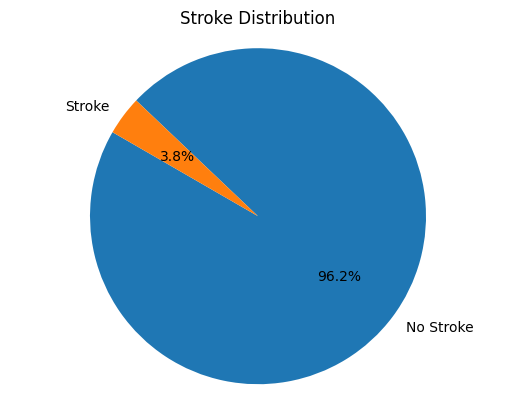

In [47]:
# Pie chart to show the distribution of stroke vs no stroke in the dataset.
stroke_counts = df['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=150)
plt.title('Stroke Distribution')
plt.axis('equal')
plt.show()

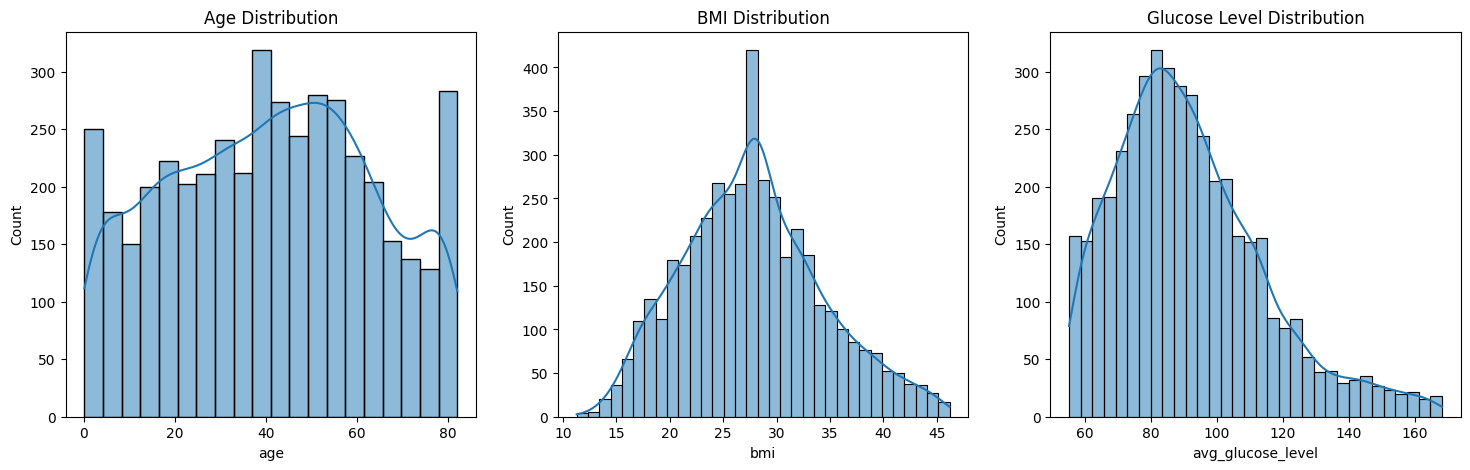

In [48]:
# Subplots to display the distributions of age, BMI, and glucose levels with KDE plots.
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(df['bmi'].dropna(), kde=True, ax=axs[1])
axs[1].set_title('BMI Distribution')

sns.histplot(df['avg_glucose_level'], kde=True, ax=axs[2])
axs[2].set_title('Glucose Level Distribution')
plt.show()

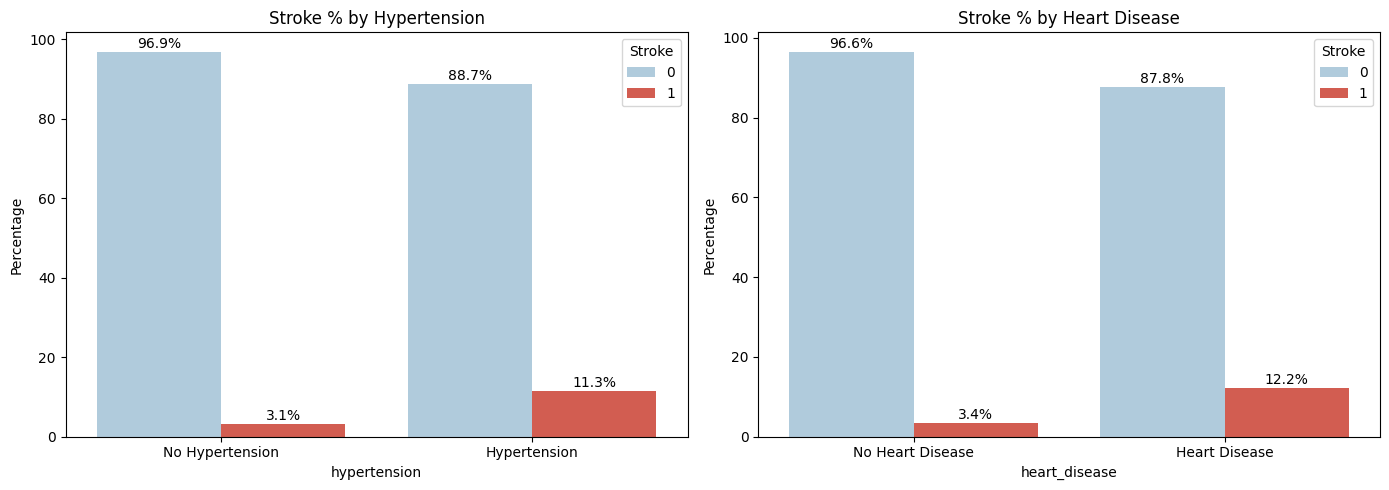

In [49]:
# Bar plots to visualize stroke percentage by hypertension and heart disease.
def get_normalized_df(group_col):
    normalized = df.groupby([group_col, 'stroke']).size().reset_index(name='count')
    normalized['percent'] = normalized['count'] / normalized.groupby(group_col)['count'].transform('sum') * 100
    return normalized
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
palette = ['#A9CCE3', '#E74C3C']
for ax, feature, title, labels in zip(
    axs,
    ['hypertension', 'heart_disease'],
    ['Stroke % by Hypertension', 'Stroke % by Heart Disease'],
    [['No Hypertension', 'Hypertension'], ['No Heart Disease', 'Heart Disease']]
):
    data = get_normalized_df(feature)
    sns.barplot(data=data, x=feature, y='percent', hue='stroke', palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Percentage')
    ax.legend(title='Stroke')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(labels)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height + 1),
                        ha='center', fontsize=10)
plt.tight_layout()
plt.show()

In [50]:
# Bar plots showing stroke count and percentage by gender, marital status, residence type, and smoking status.
df['gender'] = df['gender'].replace({0: 'Male', 1: 'Female', 2: 'Other'})
df['ever_married'] = df['ever_married'].replace({0: 'Not Married', 1: 'Married'})
df['Residence_type'] = df['Residence_type'].replace({0: 'Rural', 1: 'Urban'})
df['smoking_status'] = df['smoking_status'].replace({
    0: 'Never Smoked', 1: 'Smokes', 2: 'Formerly Smoked', 3: 'Unknown'
})
features = ['gender', 'ever_married', 'Residence_type', 'smoking_status']
titles = {
    'gender': 'Stroke Count and % by Gender',
    'ever_married': 'Stroke Count and % by Marital Status',
    'Residence_type': 'Stroke Count and % by Residence Type',
    'smoking_status': 'Stroke Count and % by Smoking Status'
}
for feature in features:
    plot_data = df.groupby([feature, 'stroke']).size().reset_index(name='count')
    plot_data['percent'] = plot_data.groupby(feature)['count'].transform(lambda x: 100 * x / x.sum())
    plot_data['stroke_label'] = plot_data['stroke'].map({0: 'No Stroke', 1: 'Stroke'})
    fig = px.bar(
        plot_data,
        x=feature,
        y='count',
        color='stroke_label',
        text=plot_data['percent'].round(1).astype(str) + '%',
        barmode='group',
        color_discrete_sequence=['#85C1E9', '#E74C3C'],
        title=titles[feature]
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(yaxis_title='Count', xaxis_title='', legend_title='Stroke', title_x=0.5)
    fig.show()

##Feature Correlation Heatmap

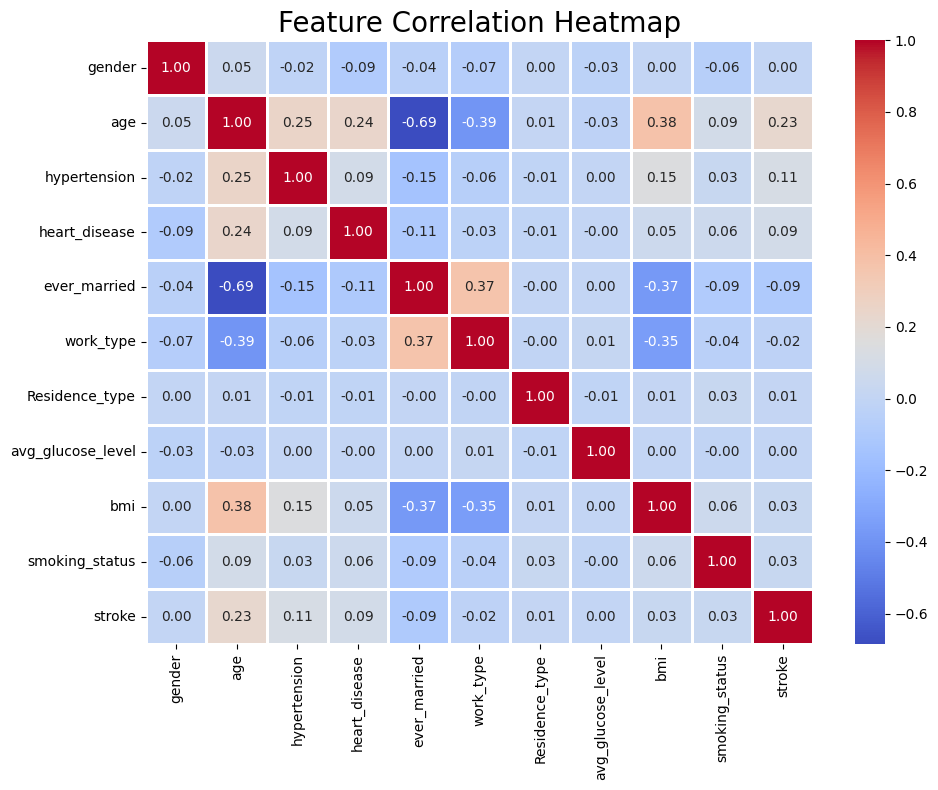

In [51]:
# Encoding the Categorical Variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

# Computing correlation matrix
corr_matrix = df.corr()

# Ploting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.75)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

## Feature Scaling

In [52]:
# Using the StandardScaler for standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('stroke', axis=1))

##Model Training and Evaluation

In [53]:
# Splitting the Data into Training and Testing Sets
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
#  Handling Class Imbalance with Conditional SMOTE Oversampling
from imblearn.over_sampling import SMOTE

# Calculating the class distribution in y_train
class_distribution = y_train.value_counts(normalize=True)

# Checking if the minority class is less than 10%
if class_distribution.min() < 0.10:
    print("Class imbalance detected. Applying SMOTE...")
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
else:
    print("No significant class imbalance detected. Proceeding without SMOTE.")
    X_train_res, y_train_res = X_train, y_train

Class imbalance detected. Applying SMOTE...


In [55]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [56]:
# Train and evaluate Decision Tree
dt_model = models["Decision Tree"]
dt_model.fit(X_train_res, y_train_res)
dt_pred = dt_model.predict(X_test)

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(f"Precision: {precision_score(y_test, dt_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, dt_pred):.4f}\n")

Decision Tree
Accuracy: 0.8952
Precision: 0.0462
F1 Score: 0.0612



In [57]:
# Train and evaluate Random Forest
rf_model = models["Random Forest"]
rf_model.fit(X_train_res, y_train_res)
rf_pred = rf_model.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}\n")

Random Forest
Accuracy: 0.9203
Precision: 0.0488
F1 Score: 0.0541



##Models Comparision

<ipython-input-58-153611d14fe2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




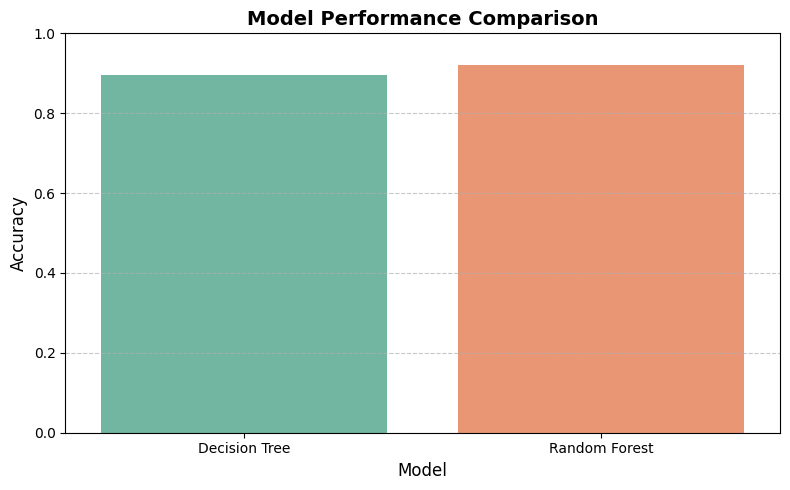

In [58]:
# Model performance metrics
results = {
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}

# Bar plot for comparing the accuracy of different models
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Feature Importance

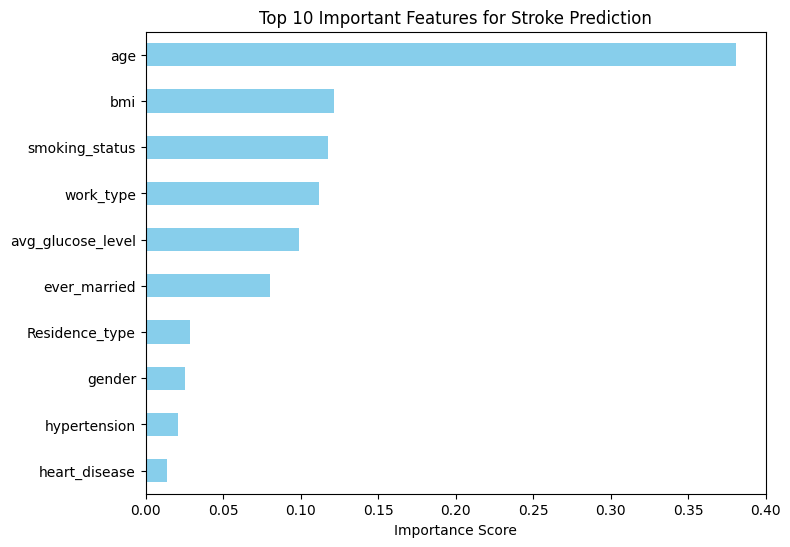

In [59]:
# Geting the feature importances from trained Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)

# Ploting the top 10 features
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features for Stroke Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

##Predicted Outcomes

In [60]:
# Generating predictions for the entire dataset
df['Predicted_DT'] = dt_model.predict(X)
df['Predicted_RF'] = rf_model.predict(X)

In [61]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Predicted_DT,Predicted_RF
2,0,80.0,0,1,0,2,0,105.92,32.5,0,1,1,1
6,0,74.0,1,1,0,2,0,70.09,27.4,0,1,1,1
7,1,69.0,0,0,1,2,1,94.39,22.8,0,1,1,1
8,1,59.0,0,0,0,2,0,76.15,28.1,1,1,1,1
9,1,78.0,0,0,0,2,1,58.57,24.2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,2,1,83.75,28.1,0,0,0,0
5106,1,81.0,0,0,0,3,1,125.20,40.0,0,0,0,0
5107,1,35.0,0,0,0,3,0,82.99,30.6,0,0,0,0
5108,0,51.0,0,0,0,2,0,166.29,25.6,2,0,0,0
